In [43]:
import get_data
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt

# getting a dataframe describing all images

the `rel_fp` column is the filepath of the image relative to the root of this directory (assuming you unzipped the data from box and left it in the folder named `MFGTMP_220317120003`)

In [44]:
df_images = get_data.load_images_df()
df_images.head()

,column,row,field,channel,rel_fp
0,B,3,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B03f02...
1,H,3,1,2,MFGTMP_220317120003/MFGTMP_220317120003_H03f01...
2,B,2,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B02f02...
3,F,1,2,2,MFGTMP_220317120003/MFGTMP_220317120003_F01f02...
4,A,1,7,1,MFGTMP_220317120003/MFGTMP_220317120003_A01f07...


# getting an image as a numpy array

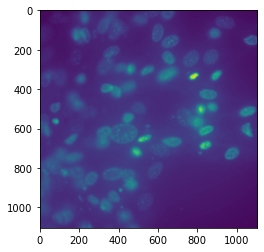

In [45]:
example_img_path = df_images['rel_fp'].values[0]
img_arr = get_data.file_to_nparray(example_img_path)
img_arr.shape
plt.imshow(img_arr)
plt.show()

# Create Column with Blur Coeficient 

In [46]:
df_images["Blur_Coef"] = 0
for i in range(len(df_images.index)):
    img = cv2.imread(df_images['rel_fp'].values[i])
    try:
        laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
        df_images.at[i,'Blur_Coef']=laplacian_var
    except:
        print("File Read Issue")
        print("Setting Blur_Coef to -1")
        df_images.at[i,'Blur_Coef']=laplacian_var
        print("indx", i )
        print("file, ",df_images['rel_fp'].values[i])
df_images.head()

File Read Issue
Setting Blur_Coef to -1
indx 751
file,  MFGTMP_220317120003/MFGTMP_220317120003_H03f08d4.TIF


,column,row,field,channel,rel_fp,Blur_Coef
0,B,3,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B03f02...,1.733168
1,H,3,1,2,MFGTMP_220317120003/MFGTMP_220317120003_H03f01...,1.773876
2,B,2,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B02f02...,1.691270
3,F,1,2,2,MFGTMP_220317120003/MFGTMP_220317120003_F01f02...,1.322336
4,A,1,7,1,MFGTMP_220317120003/MFGTMP_220317120003_A01f07...,1.234159


# Create Boolean Column "Blurry"

In [47]:
threshold = .5
df_images['Blurry'] = df_images.apply(lambda row: row.Blur_Coef < threshold , axis = 1)
df_images.head()

,column,row,field,channel,rel_fp,Blur_Coef,Blurry
0,B,3,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B03f02...,1.733168,False
1,H,3,1,2,MFGTMP_220317120003/MFGTMP_220317120003_H03f01...,1.773876,False
2,B,2,2,4,MFGTMP_220317120003/MFGTMP_220317120003_B02f02...,1.691270,False
3,F,1,2,2,MFGTMP_220317120003/MFGTMP_220317120003_F01f02...,1.322336,False
4,A,1,7,1,MFGTMP_220317120003/MFGTMP_220317120003_A01f07...,1.234159,False
